<a href="https://colab.research.google.com/github/bbutka/CEC595/blob/main/Minimum_polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

([0, 0], [-4, 5], [-4, 10], [4, 10], [7, 2])
POLYGON ((4 10, -5.875 10, -2.125 0, 7.75 0, 4 10))


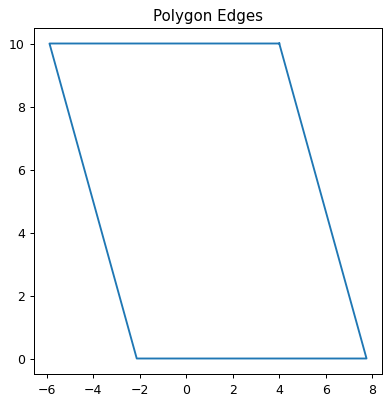

In [ ]:
import math
import numpy as np


"""
Minimal Enclosing Parallelogram

area, v1, v2, v3, v4 = mep(convex_polygon)

convex_polygon - array of points. Each point is a array [x, y] (1d array of 2 elements)
points should be presented in clockwise order.

the algorithm used is described in the following paper:
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.53.9659&rep=rep1&type=pdf
"""

def distance(p1, p2, p):
    return abs(((p2[1]-p1[1])*p[0] - (p2[0]-p1[0])*p[1] + p2[0]*p1[1] - p2[1]*p1[0]) /
        math.sqrt((p2[1]-p1[1])**2 + (p2[0]-p1[0])**2))

def antipodal_pairs(convex_polygon):
    l = []
    n = len(convex_polygon)
    p1, p2 = convex_polygon[0], convex_polygon[1]

    t, d_max = None, 0
    for p in range(1, n):
        d = distance(p1, p2, convex_polygon[p])
        if d > d_max:
            t, d_max = p, d
    l.append(t)

    for p in range(1, n):
        p1, p2 = convex_polygon[p % n], convex_polygon[(p+1) % n]
        _p, _pp = convex_polygon[t % n], convex_polygon[(t+1) % n]
        while distance(p1, p2, _pp) > distance(p1, p2, _p):
            t = (t + 1) % n
            _p, _pp = convex_polygon[t % n], convex_polygon[(t+1) % n]
        l.append(t)

    return l


# returns score, area, points from top-left, clockwise , favouring low area
def mep(convex_polygon):
    def compute_parallelogram(convex_polygon, l, z1, z2):
        def parallel_vector(a, b, c):
            v0 = [c[0]-a[0], c[1]-a[1]]
            v1 = [b[0]-c[0], b[1]-c[1]]
            return [c[0]-v0[0]-v1[0], c[1]-v0[1]-v1[1]]

        # finds intersection between lines, given 2 points on each line.
        # (x1, y1), (x2, y2) on 1st line, (x3, y3), (x4, y4) on 2nd line.
        def line_intersection(x1, y1, x2, y2, x3, y3, x4, y4):
            px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4))/((x1-x2)*(y3-y4) - (y1-y2)*(x3-x4))
            py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4))/((x1-x2)*(y3-y4) - (y1-y2)*(x3-x4))
            return px, py


        # from each antipodal point, draw a parallel vector,
        # so ap1->ap2 is parallel to p1->p2
        #    aq1->aq2 is parallel to q1->q2
        p1, p2 = convex_polygon[z1 % n], convex_polygon[(z1+1) % n]
        q1, q2 = convex_polygon[z2 % n], convex_polygon[(z2+1) % n]
        ap1, aq1 = convex_polygon[l[z1 % n]], convex_polygon[l[z2 % n]]
        ap2, aq2 = parallel_vector(p1, p2, ap1), parallel_vector(q1, q2, aq1)

        a = line_intersection(p1[0], p1[1], p2[0], p2[1], q1[0], q1[1], q2[0], q2[1])
        b = line_intersection(p1[0], p1[1], p2[0], p2[1], aq1[0], aq1[1], aq2[0], aq2[1])
        d = line_intersection(ap1[0], ap1[1], ap2[0], ap2[1], q1[0], q1[1], q2[0], q2[1])
        c = line_intersection(ap1[0], ap1[1], ap2[0], ap2[1], aq1[0], aq1[1], aq2[0], aq2[1])

        s = distance(a, b, c) * math.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)
        return s, a, b, c, d


    z1, z2 = 0, 0
    n = len(convex_polygon)

    # for each edge, find antipodal vertice for it (step 1 in paper).
    l = antipodal_pairs(convex_polygon)

    so, ao, bo, co, do, z1o, z2o = 100000000000, None, None, None, None, None, None

    # step 2 in paper.
    for z1 in range(0, n):
        if z1 >= z2:
            z2 = z1 + 1
        p1, p2 = convex_polygon[z1 % n], convex_polygon[(z1+1) % n]
        a, b, c = convex_polygon[z2 % n], convex_polygon[(z2+1) % n], convex_polygon[l[z2 % n]]
        if distance(p1, p2, a) >= distance(p1, p2, b):
            continue

        while distance(p1, p2, c) > distance(p1, p2, b):
            z2 += 1
            a, b, c = convex_polygon[z2 % n], convex_polygon[(z2+1) % n], convex_polygon[l[z2 % n]]

        st, at, bt, ct, dt = compute_parallelogram(convex_polygon, l, z1, z2)

        if st < so:
            so, ao, bo, co, do, z1o, z2o = st, at, bt, ct, dt, z1, z2

    return so, ao, bo, co, do, z1o, z2o

from matplotlib import pyplot as plt
from shapely.geometry.polygon import LinearRing, Polygon

#tp=Polygon([(0,0),(-4,5),(-4,10),(4,10),(7,2)])
#print(tp)
#x,y = tp.exterior.xy
tp=([0,0],[-4,5],[-4,10],[4,10],[7,2])
print(tp)
cp=Polygon(mep(tp)[1:5])
print(cp)

x,y = cp.exterior.xy
fig = plt.figure(1, figsize=(5,5), dpi=90)
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_title('Polygon Edges')

xrange = [10, 10]
yrange = [-10, 10]
#ax.set_xlim(*xrange)
#ax.set_xticks(range(*xrange) + [xrange[-1]])
#ax.set_ylim(*yrange)
#ax.set_yticks(range(*yrange) + [yrange[-1]])
#ax.set_aspect(1)